In [50]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import pandas as pd
# import packages

# general tools
import numpy as np

# RDkit
from rdkit import Chem
from rdkit.Chem.rdmolops import GetAdjacencyMatrix

# Pytorch and Pytorch Geometric
import torch
from torch_geometric.data import Data
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np
from tqdm import tqdm
import pandas as pd
import numpy as np
from tqdm import tqdm
import networkx as nx
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split 
import math
import matplotlib.pyplot as plt

In [3]:
atom_list = ['H', 'C', 'N', 'O', 'S', 'F', 'Si', 'P', 'Cl', 'Br', 'Mg', 'Na', 'Ca', 'Fe', 'As', 'Al', 'I', 'B', 'V', 'K', 'Tl', 'Yb', 'Sb', 'Sn', 'Ag', 'Pd', 'Co', 'Se', 'Ti', 'Zn', 'Li', 'Ge', 'Cu', 'Au', 'Ni', 'Cd', 'In', 'Mn', 'Zr', 'Cr', 'Pt', 'Hg', 'Pb', 'Unknown']
hybridization_list = ["S", "SP", "SP2", "SP3", "SP3D", "SP3D2", "OTHER"]
is_atom_in_ring = ["total_atom_in_ring"]
is_atom_aromatic = ["total_atom_in_aromatic_ring"]
atomic_mass = ["atomic_mass"]
total_chirality = ["total_CHI_UNSPECIFIED", "total_CHI_TETRAHEDRAL_CW", "total_CHI_TETRAHEDRAL_CCW", "total_CHI_OTHER"]
bond_type = ["total_single", "total_double", "total_triple", "total_aromatic"]
total_conjugated = ["total_conjugated_bond"]
total_ring = ["total_bond_in_ring"]
stereochemistry_bond = ["total_STEREOZ", "total_STEREOE", "toal_STEREOANY", "total_STEREONONE"]
feature_list = atom_list + hybridization_list + is_atom_in_ring + is_atom_aromatic + atomic_mass + total_chirality + bond_type + total_conjugated + total_ring + stereochemistry_bond
len(feature_list)

68

In [4]:
# Define the ANN model for tokenizing with specific input and output sizes using Sequential
class TokenizerANN(nn.Module):
    def __init__(self, input_size, output_size):
        
        super(TokenizerANN, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 256),  # First hidden layer
            nn.ReLU(),
            nn.Linear(256, 256),       # Third hidden layer
            nn.ReLU(),
            nn.Linear(256, 128),       # Fourth hidden layer
            nn.ReLU(),
            nn.Linear(128, 128),        # Fifth hidden layer
            nn.ReLU(),
            nn.Linear(128, output_size) ,
            nn.Softmax()# Encoder output layer
        )
       
        self.decoder = nn.Sequential(
            nn.Linear(output_size, 128),          # Decoder input layer
            nn.ReLU(),
            nn.Linear(128, 128),        # First hidden layer
            nn.ReLU(),
            nn.Linear(128, 256),       # Second hidden layer
            nn.ReLU(),
            nn.Linear(256, 256),       # Third hidden layer
            nn.ReLU(),
            nn.Linear(256, input_size)   # Decoder output layer
        )
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = TokenizerANN(input_size = len(feature_list),
                            output_size=4).to(device)
# Load the saved state dictionary into the new model instance
model.load_state_dict(torch.load("tokenizer_ann_with_decoder.pth"))

<All keys matched successfully>

### Group 0

In [45]:
group_number = 0
X = np.load(f"data/experiment_2/group_{group_number}/cluster_center.npy")
tensor_X = torch.from_numpy(X).to(device)
cc_df = pd.DataFrame(model.decoder(tensor_X).to('cpu').detach().numpy()).astype(int)
cc_df.columns = feature_list
#new_cc_df = cc_df.loc[:, (cc_df != 0).any(axis=0)]
cc_df.to_csv(f"data/experiment_2/group_{group_number}/decoded_cluster_center.csv", index=False)
cc_df.to_excel(f"data/experiment_2/group_{group_number}/decoded_cluster_center.xlsx", index=False)
cc_df_0 = cc_df
cc_df

,H,C,N,O,S,F,Si,P,Cl,Br,...,total_single,total_double,total_triple,total_aromatic,total_conjugated_bond,total_bond_in_ring,total_STEREOZ,total_STEREOE,toal_STEREOANY,total_STEREONONE
0,0,26,4,1,0,0,0,0,0,0,...,8,1,0,29,36,35,0,0,0,38
1,0,28,0,5,0,0,0,0,0,0,...,37,3,0,0,3,30,0,0,0,40
2,0,6,2,1,0,0,0,0,0,0,...,6,3,0,0,8,0,0,1,0,8
3,0,22,3,4,0,1,0,0,0,0,...,20,3,0,11,18,17,0,0,0,35


### Group 1

In [51]:
group_number = 1
X = np.load(f"data/experiment_2/group_{group_number}/cluster_center.npy")
tensor_X = torch.from_numpy(X).to(device)
cc_df = pd.DataFrame(model.decoder(tensor_X).to('cpu').detach().numpy()).astype(int)
cc_df.columns = feature_list
#new_cc_df = cc_df.loc[:, (cc_df != 0).any(axis=0)]
cc_df.to_csv(f"data/experiment_2/group_{group_number}/decoded_cluster_center.csv", index=False)
cc_df.to_excel(f"data/experiment_2/group_{group_number}/decoded_cluster_center.xlsx", index=False)
cc_df_1 = deepcopy(cc_df)
cc_df

,H,C,N,O,S,F,Si,P,Cl,Br,...,total_single,total_double,total_triple,total_aromatic,total_conjugated_bond,total_bond_in_ring,total_STEREOZ,total_STEREOE,toal_STEREOANY,total_STEREONONE
0,0,24,5,0,0,0,0,0,0,0,...,8,0,0,27,32,33,0,0,0,36
1,0,25,0,3,0,0,0,0,0,0,...,32,1,0,0,0,26,0,0,0,34
2,0,14,4,2,0,1,0,0,0,0,...,13,2,0,10,16,11,0,0,0,26
3,0,8,0,1,0,0,0,0,0,0,...,11,0,0,0,0,6,0,0,0,11


### Group 2

In [52]:
group_number = 2
X = np.load(f"data/experiment_2/group_{group_number}/cluster_center.npy")
tensor_X = torch.from_numpy(X).to(device)
cc_df = pd.DataFrame(model.decoder(tensor_X).to('cpu').detach().numpy()).astype(int)
cc_df.columns = feature_list
#new_cc_df = cc_df.loc[:, (cc_df != 0).any(axis=0)]
cc_df.to_csv(f"data/experiment_2/group_{group_number}/decoded_cluster_center.csv", index=False)
cc_df.to_excel(f"data/experiment_2/group_{group_number}/decoded_cluster_center.xlsx", index=False)
cc_df_2 = deepcopy(cc_df)
cc_df

,H,C,N,O,S,F,Si,P,Cl,Br,...,total_single,total_double,total_triple,total_aromatic,total_conjugated_bond,total_bond_in_ring,total_STEREOZ,total_STEREOE,toal_STEREOANY,total_STEREONONE
0,0,24,4,1,0,0,0,0,0,0,...,11,1,0,24,29,30,0,0,0,36
1,0,20,0,1,0,0,0,0,0,0,...,27,0,0,0,0,21,0,0,0,28
2,0,7,5,1,0,0,0,0,0,0,...,3,1,0,10,16,10,0,0,0,15
3,0,26,3,4,0,0,0,0,0,0,...,29,5,0,6,16,31,0,0,0,40


### Group 3

In [53]:
group_number = 3
X = np.load(f"data/experiment_2/group_{group_number}/cluster_center.npy")
tensor_X = torch.from_numpy(X).to(device)
cc_df = pd.DataFrame(model.decoder(tensor_X).to('cpu').detach().numpy()).astype(int)
cc_df.columns = feature_list
#new_cc_df = cc_df.loc[:, (cc_df != 0).any(axis=0)]
cc_df.to_csv(f"data/experiment_2/group_{group_number}/decoded_cluster_center.csv", index=False)
cc_df.to_excel(f"data/experiment_2/group_{group_number}/decoded_cluster_center.xlsx", index=False)
cc_df_3 = deepcopy(cc_df)
cc_df

,H,C,N,O,S,F,Si,P,Cl,Br,...,total_single,total_double,total_triple,total_aromatic,total_conjugated_bond,total_bond_in_ring,total_STEREOZ,total_STEREOE,toal_STEREOANY,total_STEREONONE
0,0,22,4,2,0,0,0,0,0,0,...,15,1,0,17,23,29,0,0,0,35
1,0,20,0,1,0,0,0,0,0,0,...,26,0,0,0,0,20,0,0,0,26
2,0,13,3,2,0,1,0,0,0,0,...,14,2,0,6,14,6,0,0,0,22
3,0,23,3,2,0,0,0,0,0,0,...,27,2,0,6,11,30,0,0,0,35


### Group 4

In [54]:
group_number = 4
X = np.load(f"data/experiment_2/group_{group_number}/cluster_center.npy")
tensor_X = torch.from_numpy(X).to(device)
cc_df = pd.DataFrame(model.decoder(tensor_X).to('cpu').detach().numpy()).astype(int)
cc_df.columns = feature_list
#new_cc_df = cc_df.loc[:, (cc_df != 0).any(axis=0)]
cc_df.to_csv(f"data/experiment_2/group_{group_number}/decoded_cluster_center.csv", index=False)
cc_df.to_excel(f"data/experiment_2/group_{group_number}/decoded_cluster_center.xlsx", index=False)
cc_df_4 = deepcopy(cc_df)
cc_df

,H,C,N,O,S,F,Si,P,Cl,Br,...,total_single,total_double,total_triple,total_aromatic,total_conjugated_bond,total_bond_in_ring,total_STEREOZ,total_STEREOE,toal_STEREOANY,total_STEREONONE
0,0,21,3,3,0,0,0,0,0,0,...,17,4,0,12,25,26,0,0,0,33
1,0,15,1,0,0,0,0,0,0,0,...,19,0,0,0,0,11,0,0,0,19
2,0,12,4,1,0,2,0,0,0,0,...,14,1,0,5,12,5,0,0,0,22
3,0,22,3,1,0,0,0,0,0,0,...,25,0,0,5,6,25,0,0,0,31


In [66]:
concantenated = pd.concat([cc_df_0, cc_df_1, cc_df_2, cc_df_3, cc_df_4])
concantenated["label"] = label
concantenated.to_csv(f"data/experiment_2/decoded_merged_cluster_center.csv", index=False)
concantenated.to_excel(f"data/experiment_2/decoded_merged_cluster_center.xlsx", index=False)
concantenated

,H,C,N,O,S,F,Si,P,Cl,Br,...,total_double,total_triple,total_aromatic,total_conjugated_bond,total_bond_in_ring,total_STEREOZ,total_STEREOE,toal_STEREOANY,total_STEREONONE,label
0,0,26,4,1,0,0,0,0,0,0,...,1,0,29,36,35,0,0,0,38,0
1,0,28,0,5,0,0,0,0,0,0,...,3,0,0,3,30,0,0,0,40,0
2,0,6,2,1,0,0,0,0,0,0,...,3,0,0,8,0,0,1,0,8,0
3,0,22,3,4,0,1,0,0,0,0,...,3,0,11,18,17,0,0,0,35,0
0,0,24,5,0,0,0,0,0,0,0,...,0,0,27,32,33,0,0,0,36,1
1,0,25,0,3,0,0,0,0,0,0,...,1,0,0,0,26,0,0,0,34,1
2,0,14,4,2,0,1,0,0,0,0,...,2,0,10,16,11,0,0,0,26,1
3,0,8,0,1,0,0,0,0,0,0,...,0,0,0,0,6,0,0,0,11,1
0,0,24,4,1,0,0,0,0,0,0,...,1,0,24,29,30,0,0,0,36,2
1,0,20,0,1,0,0,0,0,0,0,...,0,0,0,0,21,0,0,0,28,2


### Cluster Center Analysis

In [37]:
mat = np.array([np.load(f"data/experiment_2/group_{group_number}/cluster_center.npy") for group_number in range(5)])
label = [[i for j in range(mat.shape[1])] for i in range(mat.shape[0])]
label = np.reshape(np.array(label),-1)
mat = np.reshape(mat, (-1,4))
df = pd.DataFrame(mat)
df["label"] = label
df

,0,1,2,3,label
0,0.920907,0.005681,0.016145,0.057268,0
1,0.100365,0.069588,0.731536,0.098511,0
2,0.057400,0.381508,0.188766,0.372326,0
3,0.469198,0.183402,0.275921,0.071479,0
4,0.883842,0.007082,0.037368,0.071708,1
5,0.051548,0.065875,0.665455,0.217122,1
6,0.388374,0.280608,0.197610,0.133408,1
7,0.024450,0.128610,0.293095,0.553846,1
8,0.830276,0.033054,0.072073,0.064598,2
9,0.010240,0.056026,0.573489,0.360245,2


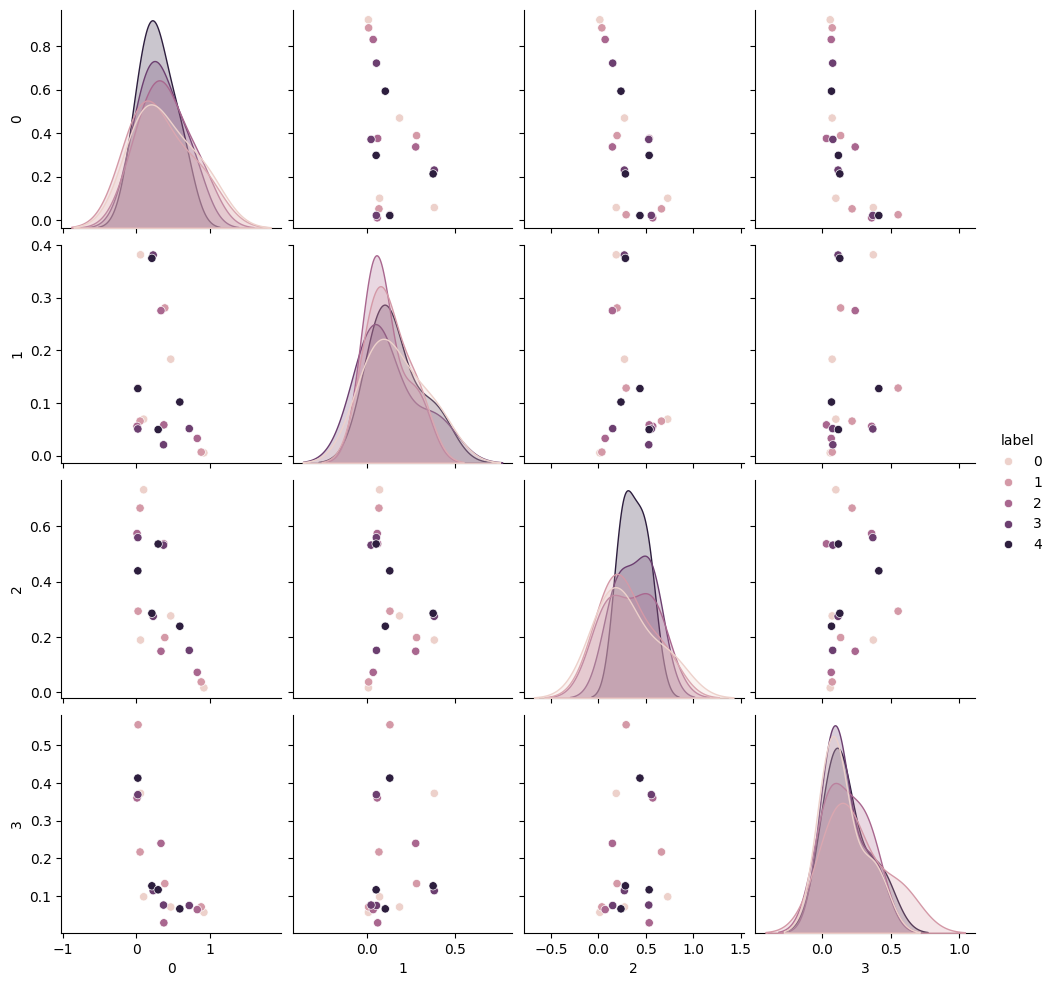

In [39]:
import seaborn as sns

sns.pairplot(df, hue="label")